# Air Quality Prediction using Decision Tree Algorithm

#### In this project we will use air pollution dataset which provide what is air quality around the city & countries of the world.
In AQI dataset they have used different AQI parameters to estimate air quality of city/country basedon longitude & latitude.

AQI Parameters :
    1] CO AQI : CO is a colorless, odorless gas that is produced by the incomplete burning of fossil fuels. High levels of CO can be toxic to humans and can cause headaches, dizziness, and nausea
    2] PM2.5 AQI : PM2.5 refers to tiny particles or droplets in the air that are 2.5 micrometers or less in width. They can be harmful to human health when inhaled, especially in high concentrations.
    3] Ozone AQI : Ozone is a gas that can form in the atmosphere through a chemical reaction between sunlight and other pollutants. High levels of ozone can be harmful to human health, particularly for those with respiratory issues.
    4]

##### Let's import all Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

##### Let's import dataset into dataframe

In [55]:
AQI = pd.read_csv("D:/ML_Datasets/AQI and Lat Long of Countries.csv")

AQI.head()

Country              City  AQI Value AQI Category  CO AQI Value  \
0  Russian Federation        Praskoveya         51     Moderate             1   
1              Brazil  Presidente Dutra         41         Good             1   
2              Brazil  Presidente Dutra         41         Good             1   
3               Italy   Priolo Gargallo         66     Moderate             1   
4              Poland         Przasnysz         34         Good             1   

  CO AQI Category  Ozone AQI Value Ozone AQI Category  NO2 AQI Value  \
0            Good               36               Good              0   
1            Good                5               Good              1   
2            Good                5               Good              1   
3            Good               39               Good              2   
4            Good               34               Good              0   

  NO2 AQI Category  PM2.5 AQI Value PM2.5 AQI Category      lat      lng  
0             Good               51           Moderate  44.7444  44.2031  
1             Good               41               Good  -5.2900 -44.4900  
2             Good               41               Good -11.2958 -41.9869  
3             Good               66           Moderate  37.1667  15.1833  
4             Good               20               Good  53.0167  20.8833

In [56]:
AQI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16695 entries, 0 to 16694
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             16393 non-null  object 
 1   City                16695 non-null  object 
 2   AQI Value           16695 non-null  int64  
 3   AQI Category        16695 non-null  object 
 4   CO AQI Value        16695 non-null  int64  
 5   CO AQI Category     16695 non-null  object 
 6   Ozone AQI Value     16695 non-null  int64  
 7   Ozone AQI Category  16695 non-null  object 
 8   NO2 AQI Value       16695 non-null  int64  
 9   NO2 AQI Category    16695 non-null  object 
 10  PM2.5 AQI Value     16695 non-null  int64  
 11  PM2.5 AQI Category  16695 non-null  object 
 12  lat                 16695 non-null  float64
 13  lng                 16695 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.8+ MB


In [6]:
print("Unique values for countries=", AQI.Country.nunique())
print("Unique values for city=", AQI.City.nunique())
print("Unique values for CO AQI Value=", AQI['CO AQI Value'].nunique())
print("Unique values for CO AQI Category=", AQI['CO AQI Category'].nunique())
print("Unique values for Ozone AQI Category	=", AQI['Ozone AQI Category'].nunique())
print("Unique values for NO2 AQI Category=", AQI['NO2 AQI Category'].nunique())
print("Unique values for PM2.5 AQI Value=", AQI['PM2.5 AQI Value'].nunique())
print("Unique values for PM2.5 AQI Category=", AQI['PM2.5 AQI Category'].nunique())
print("Unique values for lat=", AQI['lat'].nunique())
print("Unique values for lng=", AQI['lng'].nunique())

Unique values for countries= 174
Unique values for city= 14229
Unique values for CO AQI Value= 31
Unique values for CO AQI Category= 3
Unique values for Ozone AQI Category	= 5
Unique values for NO2 AQI Category= 2
Unique values for PM2.5 AQI Value= 298
Unique values for PM2.5 AQI Category= 6
Unique values for lat= 14135
Unique values for lng= 14896


In [7]:
print(AQI['AQI Category'].unique())

['Moderate' 'Good' 'Unhealthy' 'Very Unhealthy'
 'Unhealthy for Sensitive Groups' 'Hazardous']


### One Hot Encoding

From above data set info, we have AQI Category, CO AQI Category, Ozone AQI Category & PM2.5 AQI Category columns have catagorical values.
Deep learning model an't process catagorical values and we need to encode them into integer values.

For this we will use one hot encoding to transform catgorical values into integer. This will be achieved by creating separate column for indivisual catagorical values of column and whichever catgory is applicable for particular record will be flagged as '1' & rest will be flagged as'0'.



In [57]:
AQI_new = pd.get_dummies(AQI, columns=["CO AQI Category", "Ozone AQI Category", "NO2 AQI Category", "PM2.5 AQI Category"])

print(AQI_new)

                        Country              City  AQI Value AQI Category  \
0            Russian Federation        Praskoveya         51     Moderate   
1                        Brazil  Presidente Dutra         41         Good   
2                        Brazil  Presidente Dutra         41         Good   
3                         Italy   Priolo Gargallo         66     Moderate   
4                        Poland         Przasnysz         34         Good   
...                         ...               ...        ...          ...   
16690  United States of America  Highland Springs         54     Moderate   
16691                  Slovakia            Martin         71     Moderate   
16692                  Slovakia            Martin         71     Moderate   
16693                    France            Sceaux         50         Good   
16694  United States of America       Westerville         71     Moderate   

       CO AQI Value  Ozone AQI Value  NO2 AQI Value  PM2.5 AQI Value      l

##### Now that we have imported dataset, let's visualize it

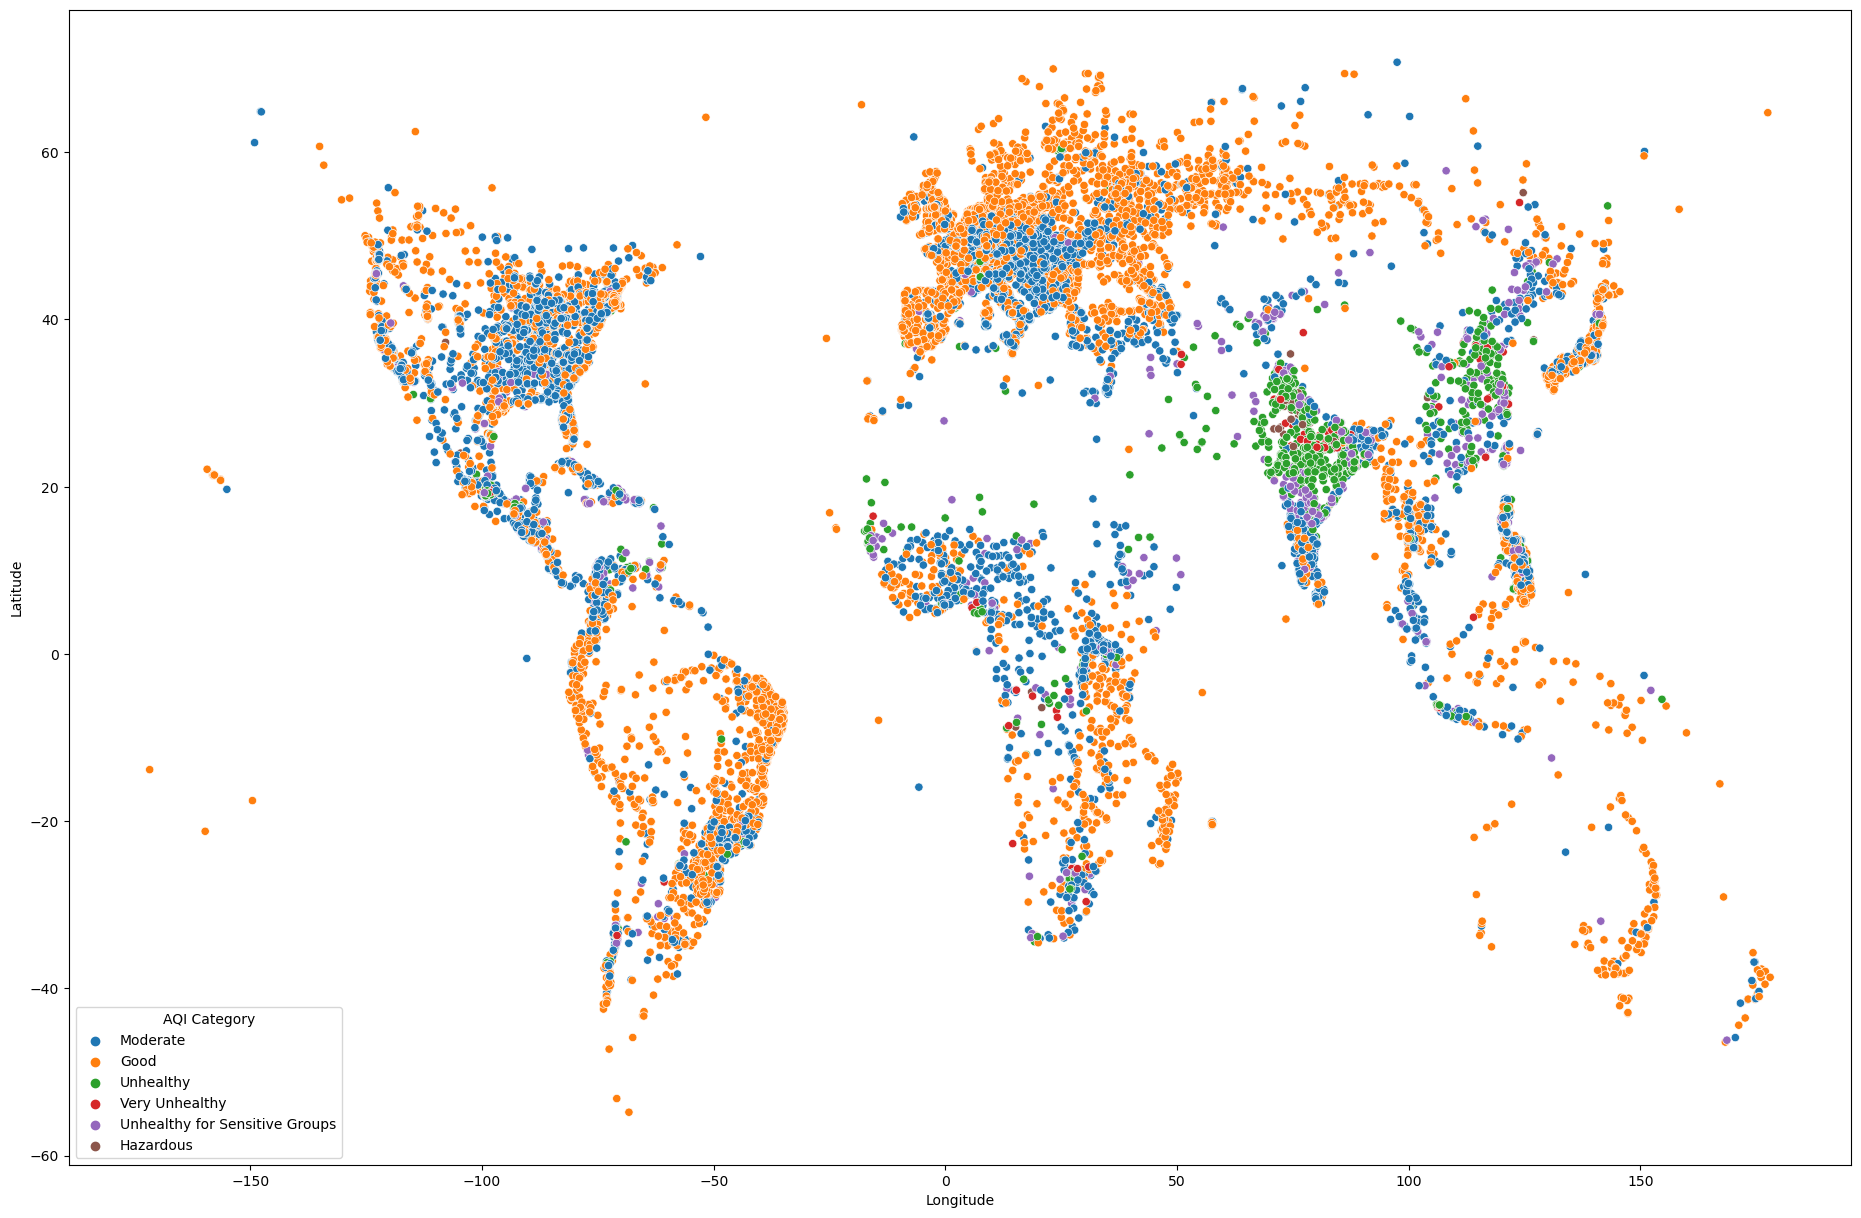

In [9]:
plt.figure(figsize=(23,15))
sns.scatterplot(data=AQI, x='lng', y='lat', hue=AQI["AQI Category"])
plt.xlabel("Longitude")
plt.ylabel('Latitude')
plt.show()

now let's check significance of each feature with another & tarrget feature

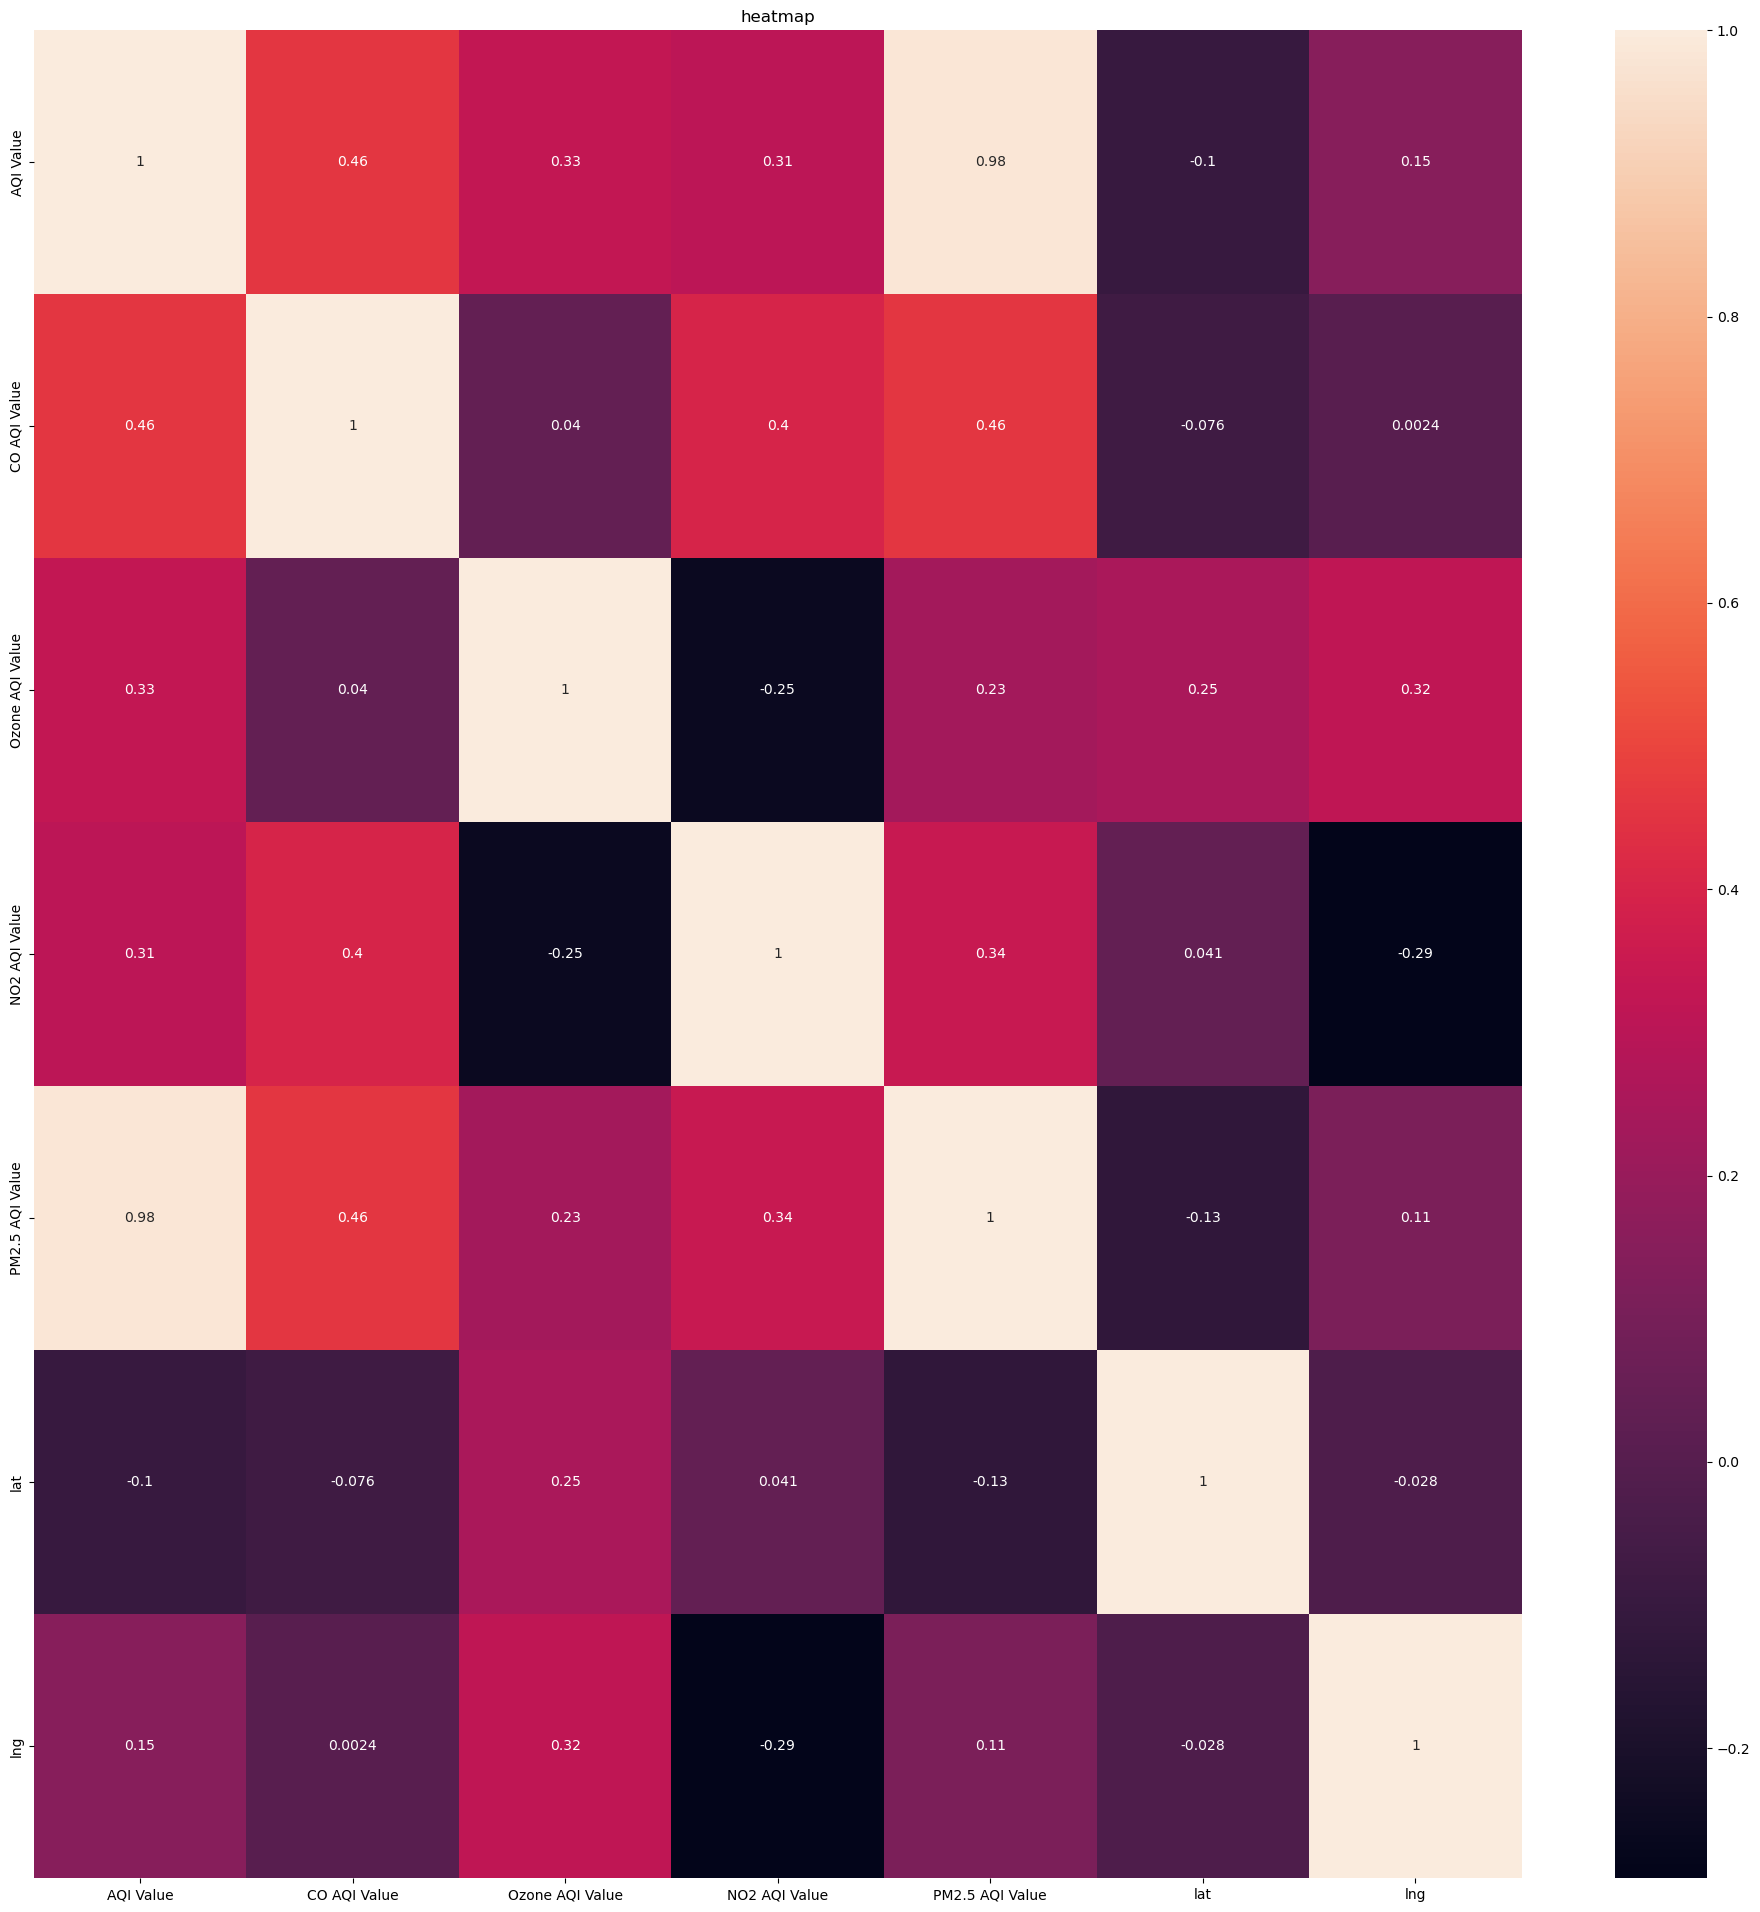

In [8]:
corc = AQI.corr()

plt.figure(figsize=(24,24))
sns.heatmap(corc, annot=True)
plt.title("heatmap")
plt.show()

From above figure and analysis we can see that country and city has no significance to predict AQI value so we an drop these two columns from dataset.

Now from above data set we have NO2 AQI Value which is Numeric and NO2 AQI catgory as hot enoded which represnts same data but in different format.
For now we will use all these values to see how our model performs

Also, we have AQI values and category column which represents the same output. But here for any use it will be more helpful if we provide theAQI catgory i.e air quality as good, bd or moderate than AQI value  which normal users cant understand.

In [58]:
AQI_new.drop(columns=AQI_new.columns[0:3], inplace=True)
print(AQI_new)

      AQI Category  CO AQI Value  Ozone AQI Value  NO2 AQI Value  \
0         Moderate             1               36              0   
1             Good             1                5              1   
2             Good             1                5              1   
3         Moderate             1               39              2   
4             Good             1               34              0   
...            ...           ...              ...            ...   
16690     Moderate             1               34              5   
16691     Moderate             1               39              1   
16692     Moderate             1               39              1   
16693         Good             1               20              5   
16694     Moderate             1               44              2   

       PM2.5 AQI Value      lat      lng  CO AQI Category_Good  \
0                   51  44.7444  44.2031                     1   
1                   41  -5.2900 -44.4900           

# Ordinal Encoding

As we can see, we have categorical output variable 'AQI catgory' which will create problem for machine learning algorithm for predicting output as it can't process categorical data.

To convert categorical data to integer values we will use ordinal encoding. This will help us to encode catagriocal output value to integer value.
This ordinal encoding transform is available in the scikit-learn Python machine learning library via the OrdinalEncoder class.

In [10]:
#!pip install category_encoders

import category_encoders as ce
import pandas as pd

#df=pd.DataFrame({'height':['tall','medium','short','tall','medium','short','tall','medium','short',]})


# create object of Ordinalencoding
AQI_encode = pd.DataFrame()
AQI_encode = AQI_new['AQI Category']

encoder= ce.OrdinalEncoder(cols=['AQI Category'],return_df=True,
                           mapping=[{'col':'AQI Category',
'mapping':{'Hazardous':0,'Unhealthy for Sensitive Groups':1,'Very Unhealthy':2,'Unhealthy':3, 'Good':4, 'Moderate':5}}])

#Original data

#print(df)
AQI_new['AQI_output'] = encoder.fit_transform(AQI_encode)

print(AQI_encode['AQI_output'])

       AQI Category
0                 5
1                 4
2                 4
3                 5
4                 4
...             ...
16690             5
16691             5
16692             5
16693             4
16694             5

[16695 rows x 1 columns]


C:\Users\DELL\AppData\Local\Temp\ipykernel_2260\4154799624.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AQI_encode['AQI_output'] = encoder.fit_transform(AQI_encode)


# Labelclass Encoder

This OrdinalEncoder class is intended for input variables that are organized into rows and columns, e.g. a matrix.

If a categorical target variable needs to be encoded for a classification predictive modeling problem, then the LabelEncoder class can be used. It does the same thing as the OrdinalEncoder, although it expects a one-dimensional input for the single target variable


In [14]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

le.fit(["Hazardous", "Unhealthy for Sensitive Groups", "Very Unhealthy", "Unhealthy", "Good", "Moderate"])

print(le.classes_)

AQI_new['AQI Category'] = le.transform(AQI_new['AQI Category'])

list(le.inverse_transform([2, 2, 1]))

['Good' 'Hazardous' 'Moderate' 'Unhealthy'
 'Unhealthy for Sensitive Groups' 'Very Unhealthy']


['Moderate', 'Moderate', 'Hazardous']

In [15]:
#AQI_new['AQI Category'] = AQI_encode['AQI_output']
print(AQI_new)

       AQI Category  CO AQI Value  Ozone AQI Value  NO2 AQI Value  \
0                 2             1               36              0   
1                 0             1                5              1   
2                 0             1                5              1   
3                 2             1               39              2   
4                 0             1               34              0   
...             ...           ...              ...            ...   
16690             2             1               34              5   
16691             2             1               39              1   
16692             2             1               39              1   
16693             0             1               20              5   
16694             2             1               44              2   

       PM2.5 AQI Value      lat      lng  CO AQI Category_Good  \
0                   51  44.7444  44.2031                     1   
1                   41  -5.2900 -44.490

In [20]:
train_data = AQI_new.sample(frac = 0.6, random_state = 42)
#output_train = data['Price'].sample(frac = 0.6, random_state=42)

test_val_data = AQI_new.drop(train_data.index)
#output_test_val = data['Price'].drop(output_train.index)

val_data = test_val_data.sample(frac = 0.5, random_state = 42)
#output_val = output_test_val.sample(frac = 0.5, random_state = 42)

test_data = test_val_data.drop(val_data.index)
#output_test = output_test_val.drop(output_val.index)

In [21]:
print(train_data.iloc[:, 1:])

       CO AQI Value  Ozone AQI Value  NO2 AQI Value  PM2.5 AQI Value      lat  \
11822             1               38              1               32  52.1600   
7379              2               25              8              150   9.3190   
6494              2               26              3              157  14.7667   
8749              2               45              4               58  45.5333   
5129              5                1             12              156 -22.9467   
...             ...              ...            ...              ...      ...   
5882              1               35              4               54  45.4064   
9782              3              117              3              101  23.6700   
13549             0               34              0               14  53.5355   
10937             0               21              0               27  11.4167   
15465             2               29              6               60  51.9381   

            lng  CO AQI Cat

In [22]:
x_train = train_data.iloc[:, 1:]
y_train = train_data['AQI Category']

x_val = val_data.iloc[:, 1:]
y_val = val_data["AQI Category"]

x_test = test_data.iloc[:, 1:]
y_test = test_data[["AQI Category"]]


# Decision Tree Classifier


As we know this is classification problem, let's try decision tree algorithm to see how accurately model works. This model is easy to undersatnd as it creates tree like structure to make decision based on various conditions.

Decision tree uses binary tree alogorihm to predict or make decisions. It splits data based on 'gini' or 'Entropy' criterion. It then chooses best splitting node so that we can get pure leaf node i.e final output.

### Splitting decision:

##### Gini : 
The gini index is the measure of probability of any random instance being missclassified when choosen randomly.

   #####Formula :
                        gini = 1 - ∑ (i=1 to n) P(i)^2
                        
  
  We need to calculate gini index for each subfeature of parent node and then calcuate weighted average of all sub-feature.
  The feature which has low gini index that is feature having less probability of getting misclassified will be choosen to split the data.
  This criterion will be used to split data further till we get leaf node or 0 gini index.




##### Entropy  or Information gain: 
Entropy is nothing but the measure of randomness or impurity in a given data. Impurity is nothing but if leaf node is belongs to only 1 class/catgory then impurity for that node is 0 and if node belongs to diffrent class/category then the entropy will be grater than 0 and max 1.we split the data so that we can have maximum information gain.

The formula to do is we need to calculate entropy at parent node and entropy of children node and then Information gain by subtracting entropy of children node from parent node.
                            #### Information gain = Entropy(p) - Entropy(c)
                            
                            
Step 1: To begin with we will first calculate probability variable and then entropy for each variable.
 
     E = -(P_1 log2(P_1)) + (P_2 log2(P_2))
 
      like we have below features and we need to selet one feature to split the dataand that will be our ROOT node.
     1   CO AQI Value        16695 non-null  int64  
     2   CO AQI Category     16695 non-null  object 
     3   Ozone AQI Value     16695 non-null  int64  
     4   Ozone AQI Category  16695 non-null  object 
     5   NO2 AQI Value       16695 non-null  int64  
     6   NO2 AQI Category    16695 non-null  object 
     7  PM2.5 AQI Value     16695 non-null  int64  
     8  PM2.5 AQI Category  16695 non-null  object 
     9  lat                 16695 non-null  float64
     10  lng                 16695 non-null  float64
 
 The first step is to calculate entropy for each feature.
 
 
 Step 2 : calculate Average entropy of each sub-features.
 
 #### Avergrage Entropy
 
   E_avg = ((n_subnode1 / n_parent) * E_subnode1) + ((n_subnode2 / n_parent) * E_subnode2)
   
 
 Step 3: and after that calculate entropy at each node by subtracting avarage of sub-feature entropy from parent-node entropy  and select best node to split data which gives highest information gain.
 
 
 
 #### Information gain = E(p) - E_avg
 
 
 Continue above steps till we get pure leaf node.
 
 
 https://towardsdatascience.com/decision-trees-explained-entropy-information-gain-gini-index-ccp-pruning-4d78070db36c#:~:text=The%20Gini%20index%20has%20a,and%20maximum%20purity%20is%200.&text=Now%20that%20we%20have%20understood,to%20how%20they%20do%20prediction.
 
 
 
 
 
 

# CART Algorithm:

## Classification And Regression Tree Algorithm

We have two types of decision tree:
### 1] Regression Decision tree :
            Regression decision tree is used when have continious target/dependant variable. It uses threshold value to as criterion to split dataset.
      
### 2] Classification Decision Tree:
            Classification decision tree is used when we have catgorical dependant variable.
            
### When used together it called CART (Classification And Regression Tree) algorithm.

In [18]:
from sklearn.tree import DecisionTreeClassifier

AQI_Classifier = DecisionTreeClassifier(max_depth = 100, random_state = 93)  

In [23]:
AQI_Classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=100, random_state=93)

In [24]:
train_predictions = AQI_Classifier.predict(x_train)
val_predictions = AQI_Classifier.predict(x_val)


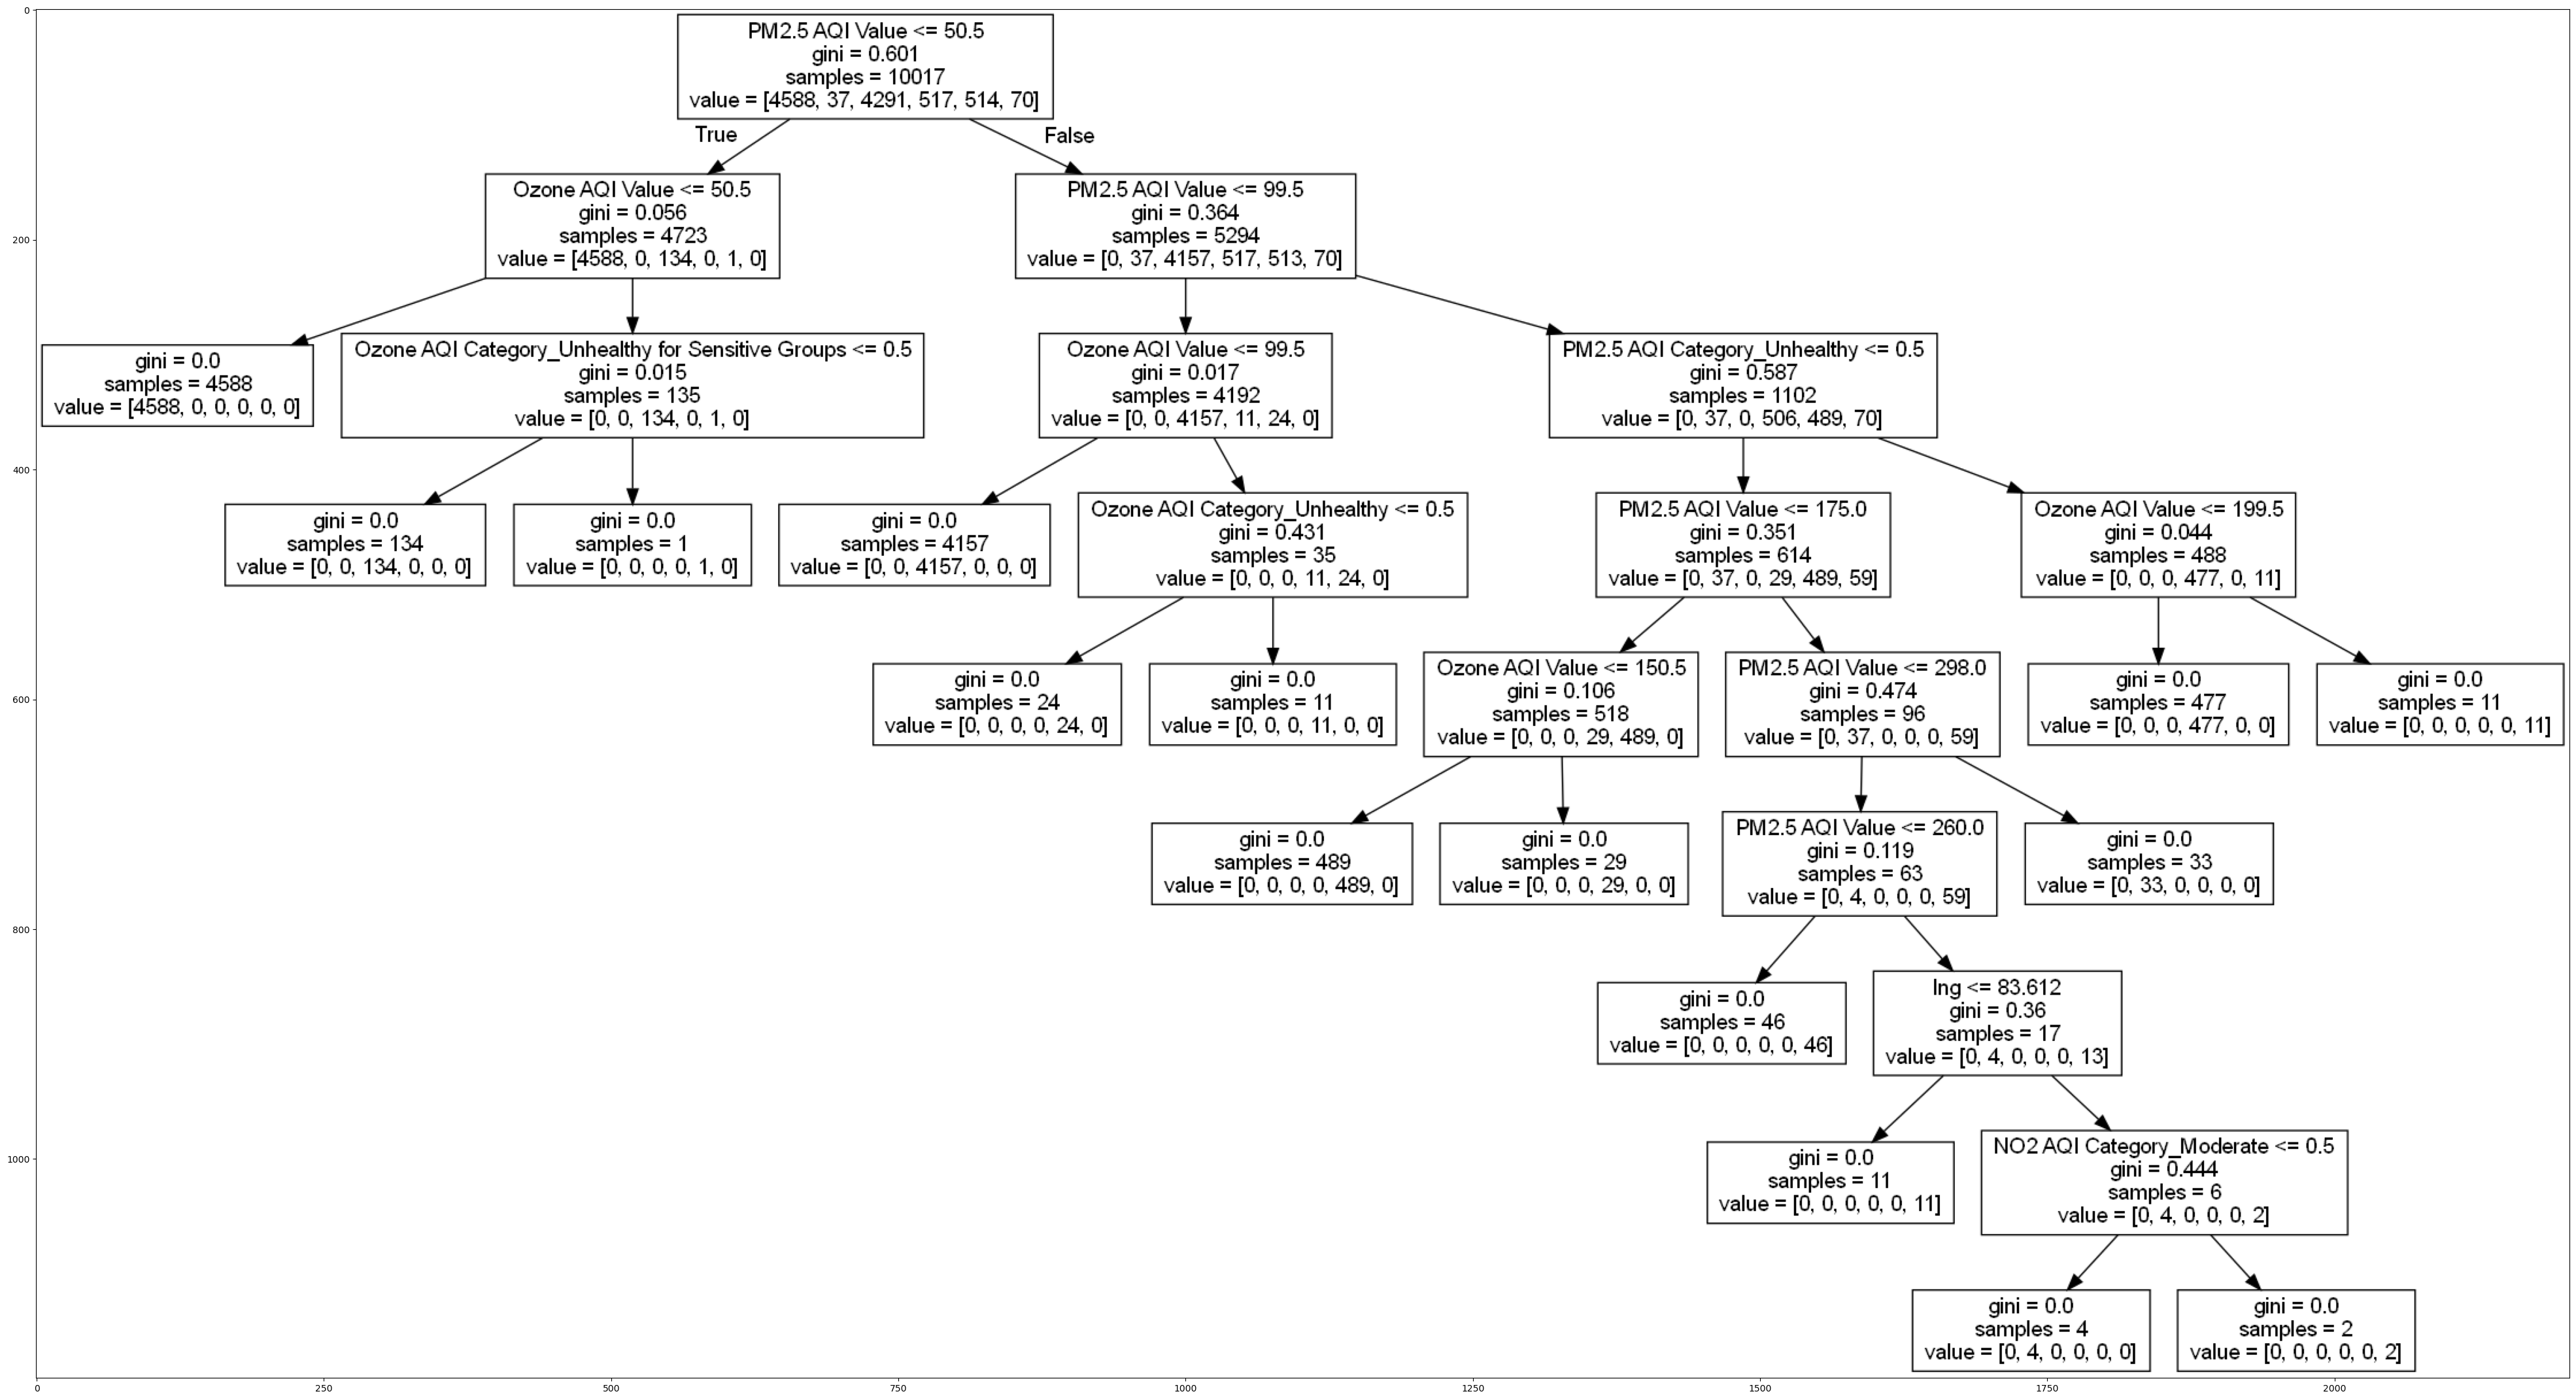

In [25]:
AQI_1 = AQI_new.iloc[:, 1:]
#AQI_1.drop(["lng", "lat"], axis = 1, inplace=True)
#print(AQI_1)
from sklearn.tree import export_graphviz
#import python-graphviz
import graphviz
export_graphviz(AQI_Classifier, 'tree.dot', feature_names = AQI_1.columns)
! dot -Tpng tree.dot -o tree.png

#!pip install opencv-python

import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (50, 50))
plt.imshow(img)


In [27]:
train_accuracy = AQI_Classifier.score(x_train,y_train)
print("Accuracy of the model on train data = ",train_accuracy)
# Getting the accuracy on test data
val_accuracy = AQI_Classifier.score(x_val,y_val)
print("Accuracy of the model on validation data = ",val_accuracy)
from sklearn.metrics import classification_report
# Generating the report and printing the same
print(classification_report(y_val,val_predictions))


output = pd.DataFrame({"Actual" : y_val, "Predicted" : val_predictions})
print(output)

Accuracy of the model on train data =  1.0
Accuracy of the model on validation data =  0.9991015274034142
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1546
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00      1413
           3       1.00      0.99      0.99       172
           4       1.00      1.00      1.00       171
           5       0.88      1.00      0.94        23

    accuracy                           1.00      3339
   macro avg       0.98      0.99      0.98      3339
weighted avg       1.00      1.00      1.00      3339

       Actual  Predicted
8210        0          0
11603       2          2
14933       0          0
3924        0          0
4063        0          0
...       ...        ...
11          2          2
7490        2          2
6324        0          0
1724        2          2
4927        2          2

[3339 rows x 2 columns]


In [28]:

test_predictions = AQI_Classifier.predict(x_test)
test_accuracy = AQI_Classifier.score(x_test,y_test)
print("Accuracy of the model on validation data = ",test_accuracy)
print(classification_report(y_test,test_predictions))

Accuracy of the model on validation data =  0.9982030548068284
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1574
           1       0.85      1.00      0.92        11
           2       1.00      1.00      1.00      1350
           3       0.99      0.99      0.99       182
           4       0.99      1.00      1.00       184
           5       0.97      0.89      0.93        38

    accuracy                           1.00      3339
   macro avg       0.97      0.98      0.97      3339
weighted avg       1.00      1.00      1.00      3339



In [29]:

y_test = np.array(y_test)
y_test = y_test.flatten()
output_test = pd.DataFrame({"Actual" : y_test, "Actual category": le.inverse_transform(y_test) , "Predicted" : test_predictions, "Predicted Categor": le.inverse_transform(test_predictions)})
output_test

Actual Actual category  Predicted Predicted Categor
0          0            Good          0              Good
1          0            Good          0              Good
2          2        Moderate          2          Moderate
3          2        Moderate          2          Moderate
4          2        Moderate          2          Moderate
...      ...             ...        ...               ...
3334       0            Good          0              Good
3335       2        Moderate          2          Moderate
3336       2        Moderate          2          Moderate
3337       3       Unhealthy          3         Unhealthy
3338       2        Moderate          2          Moderate

[3339 rows x 4 columns]

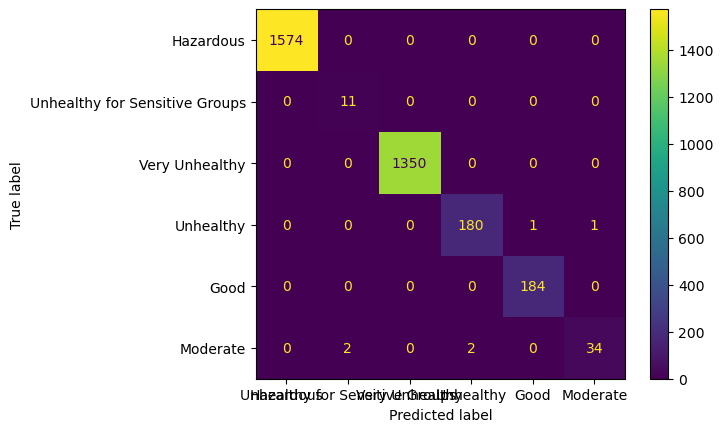

In [30]:
from sklearn import metrics

    
    
confusion_matrix = metrics.confusion_matrix(y_test, test_predictions)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Hazardous", "Unhealthy for Sensitive Groups", "Very Unhealthy", "Unhealthy", "Good", "Moderate"])

cm_display.plot()
plt.show()

    

In [31]:
print(AQI_new.columns)

Index(['AQI Category', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value',
       'PM2.5 AQI Value', 'lat', 'lng', 'CO AQI Category_Good',
       'CO AQI Category_Moderate',
       'CO AQI Category_Unhealthy for Sensitive Groups',
       'Ozone AQI Category_Good', 'Ozone AQI Category_Moderate',
       'Ozone AQI Category_Unhealthy',
       'Ozone AQI Category_Unhealthy for Sensitive Groups',
       'Ozone AQI Category_Very Unhealthy', 'NO2 AQI Category_Good',
       'NO2 AQI Category_Moderate', 'PM2.5 AQI Category_Good',
       'PM2.5 AQI Category_Hazardous', 'PM2.5 AQI Category_Moderate',
       'PM2.5 AQI Category_Unhealthy',
       'PM2.5 AQI Category_Unhealthy for Sensitive Groups',
       'PM2.5 AQI Category_Very Unhealthy'],
      dtype='object')


Now let's check how model is working after removing categorical data. that s by removing (CO AQI Category, Ozone AQI Category, NO2 AQI Category, PM2.5 AQI Category) variables from dataset.
The reason being same data is available in numeric form, so we will try how our model perform with only numeric and categorical data.

In [32]:
AQI_Numeric = pd.DataFrame()

AQI_Numeric = AQI_new[['AQI Category', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value', 'lat', 'lng' ]]

print(AQI_Numeric)

       AQI Category  CO AQI Value  Ozone AQI Value  NO2 AQI Value  \
0                 2             1               36              0   
1                 0             1                5              1   
2                 0             1                5              1   
3                 2             1               39              2   
4                 0             1               34              0   
...             ...           ...              ...            ...   
16690             2             1               34              5   
16691             2             1               39              1   
16692             2             1               39              1   
16693             0             1               20              5   
16694             2             1               44              2   

       PM2.5 AQI Value      lat      lng  
0                   51  44.7444  44.2031  
1                   41  -5.2900 -44.4900  
2                   41 -11.2958 -41.9869  

In [33]:
train_numeric = AQI_Numeric.sample(frac = 0.6, random_state = 42)
#output_train = data['Price'].sample(frac = 0.6, random_state=42)

test_val_numeric = AQI_Numeric.drop(train_data.index)
#output_test_val = data['Price'].drop(output_train.index)

val_numeric = test_val_numeric.sample(frac = 0.5, random_state = 42)
#output_val = output_test_val.sample(frac = 0.5, random_state = 42)

test_numeric = test_val_numeric.drop(val_data.index)
#output_test = output_test_val.drop(output_val.index)

In [34]:
x_train1 = train_numeric.iloc[:, 1:]
y_train1 = train_numeric['AQI Category']

x_val1 = val_numeric.iloc[:, 1:]
y_val1 = val_numeric["AQI Category"]

x_test1 = test_numeric.iloc[:, 1:]
y_test1 = test_numeric[["AQI Category"]]

print(x_val1)

       CO AQI Value  Ozone AQI Value  NO2 AQI Value  PM2.5 AQI Value      lat  \
8210              1               38              4               33  40.6858   
11603             1               31              0               53  55.5069   
14933             1               38              2               34  42.9118   
3924              1               16              4               45 -37.1333   
4063              1               19              9               33  45.4920   
...             ...              ...            ...              ...      ...   
11                1               30              4               59  50.3892   
7490              2                0              2               51   1.6833   
6324              2               39              0               29  47.6018   
1724              1               37              2               66  48.1411   
4927              2               22             13               58  47.7735   

            lng  
8210   -7

In [35]:
from sklearn.tree import DecisionTreeClassifier

AQI_C1 = DecisionTreeClassifier(criterion="entropy", max_depth = 100, random_state = 93)  

In [36]:
AQI_C1.fit(x_train1, y_train1)

DecisionTreeClassifier(criterion='entropy', max_depth=100, random_state=93)

In [37]:
AQI_1 = AQI_Numeric.iloc[:, 1:]
print(AQI_1)

       CO AQI Value  Ozone AQI Value  NO2 AQI Value  PM2.5 AQI Value      lat  \
0                 1               36              0               51  44.7444   
1                 1                5              1               41  -5.2900   
2                 1                5              1               41 -11.2958   
3                 1               39              2               66  37.1667   
4                 1               34              0               20  53.0167   
...             ...              ...            ...              ...      ...   
16690             1               34              5               54  37.5516   
16691             1               39              1               71  49.0650   
16692             1               39              1               71  36.3385   
16693             1               20              5               50  48.7786   
16694             1               44              2               71  40.1241   

           lng  
0      44.

In [38]:
train_pred = AQI_C1.predict(x_train1)
val_pred = AQI_C1.predict(x_val1)

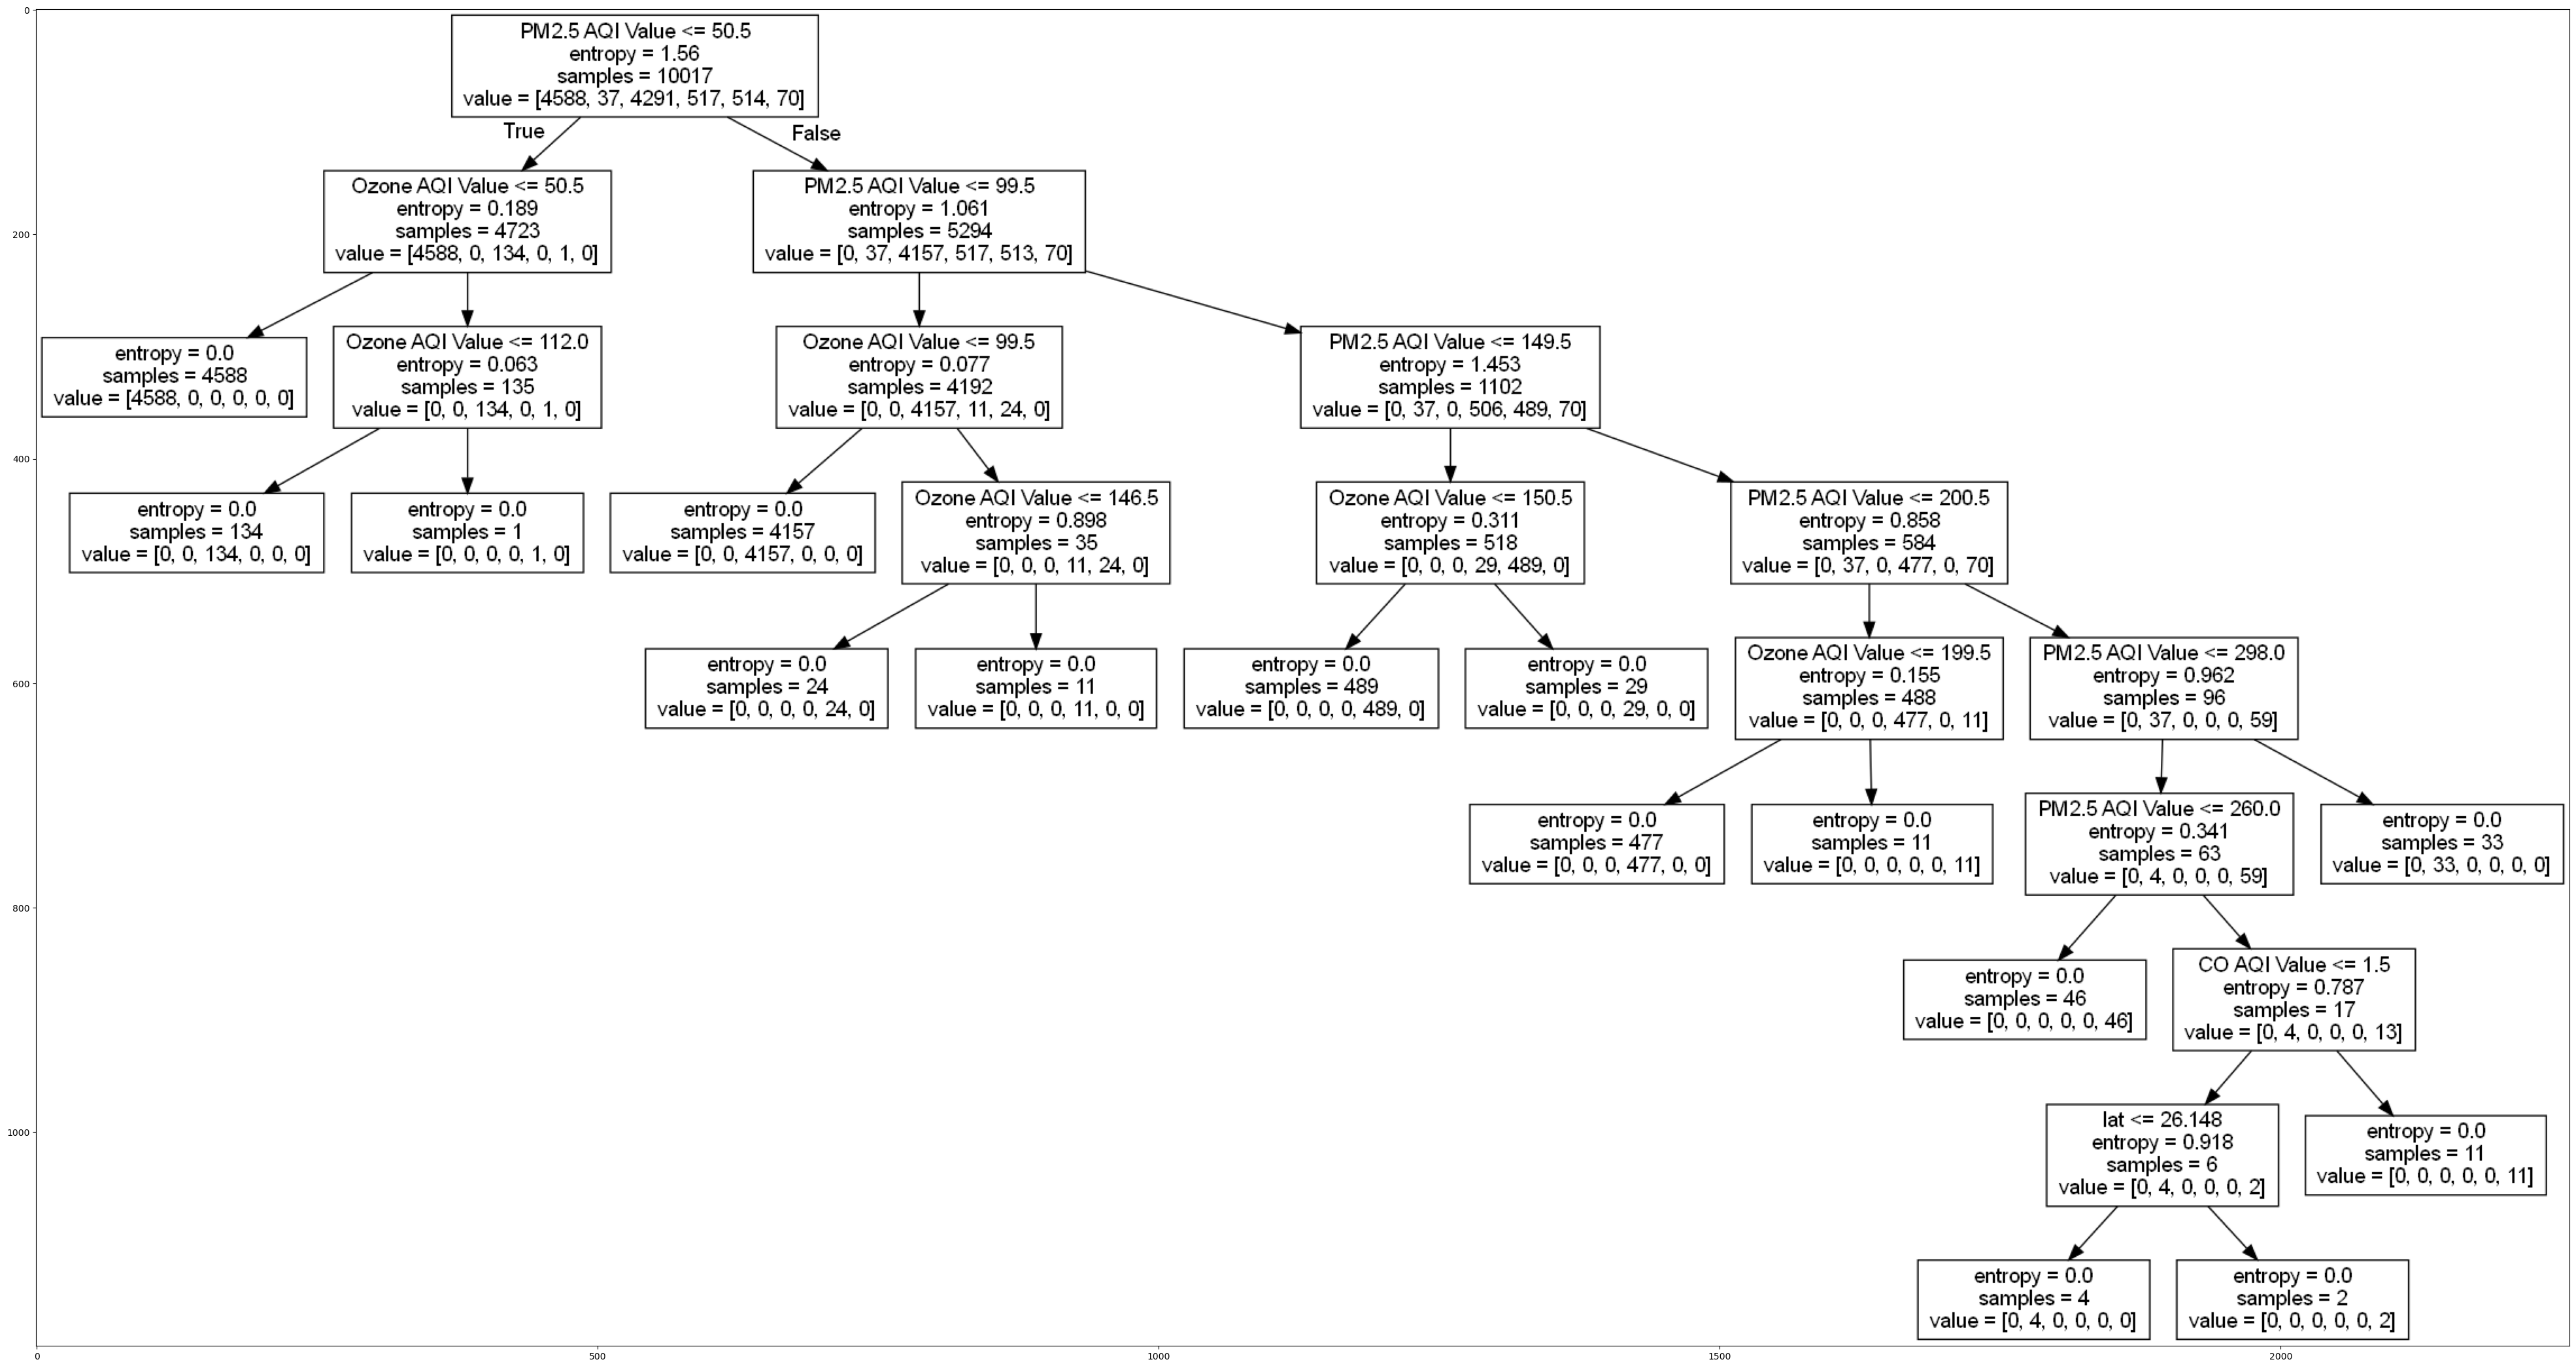

In [39]:
AQI_1 = AQI_Numeric.iloc[:, 1:]
#AQI_1.drop(["lng", "lat"], axis = 1, inplace=True)
#print(AQI_1)
from sklearn.tree import export_graphviz
#import python-graphviz
import graphviz
export_graphviz(AQI_C1, 'tree1.dot', feature_names = AQI_1.columns)
! dot -Tpng tree1.dot -o tree.png

#!pip install opencv-python

import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (50, 50))
plt.imshow(img)


In [40]:
train_accu = AQI_C1.score(x_train1,y_train1)
print("Accuracy of the model on train data = ",train_accu)
# Getting the accuracy on test data
val_accu = AQI_C1.score(x_val1,y_val1)
print("Accuracy of the model on validation data = ",val_accu)
from sklearn.metrics import classification_report
# Generating the report and printing the same
print(classification_report(y_val1,val_pred))


output = pd.DataFrame({"Actual" : y_val1, "Predicted" : val_pred})
print(output)

Accuracy of the model on train data =  1.0
Accuracy of the model on validation data =  0.9991015274034142
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1546
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00      1413
           3       1.00      0.99      0.99       172
           4       1.00      1.00      1.00       171
           5       0.88      1.00      0.94        23

    accuracy                           1.00      3339
   macro avg       0.98      0.99      0.98      3339
weighted avg       1.00      1.00      1.00      3339

       Actual  Predicted
8210        0          0
11603       2          2
14933       0          0
3924        0          0
4063        0          0
...       ...        ...
11          2          2
7490        2          2
6324        0          0
1724        2          2
4927        2          2

[3339 rows x 2 columns]


In [41]:
test_pred = AQI_C1.predict(x_test1)
test_accu = AQI_C1.score(x_test1,y_test1)
print("Accuracy of the model on validation data = ",test_accu)
print(classification_report(y_test1,test_pred))

Accuracy of the model on validation data =  0.998502545672357
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1574
           1       1.00      0.91      0.95        11
           2       1.00      1.00      1.00      1350
           3       0.99      0.99      0.99       182
           4       0.99      1.00      1.00       184
           5       0.95      0.95      0.95        38

    accuracy                           1.00      3339
   macro avg       0.99      0.97      0.98      3339
weighted avg       1.00      1.00      1.00      3339



In [42]:
y_test1 = np.array(y_test1)
y_test1 = y_test1.flatten()
op_test = pd.DataFrame({"Actual" : y_test1, "Actual category": le.inverse_transform(y_test1) , "Predicted" : test_pred, "Predicted Category": le.inverse_transform(test_pred)})
op_test

Actual Actual category  Predicted Predicted Category
0          0            Good          0               Good
1          0            Good          0               Good
2          2        Moderate          2           Moderate
3          2        Moderate          2           Moderate
4          2        Moderate          2           Moderate
...      ...             ...        ...                ...
3334       0            Good          0               Good
3335       2        Moderate          2           Moderate
3336       2        Moderate          2           Moderate
3337       3       Unhealthy          3          Unhealthy
3338       2        Moderate          2           Moderate

[3339 rows x 4 columns]

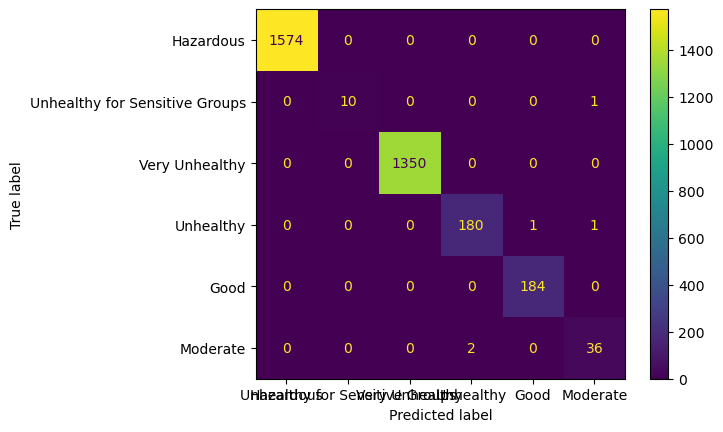

In [43]:
from sklearn import metrics

    
    
confusion_matrix = metrics.confusion_matrix(y_test1, test_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Hazardous", "Unhealthy for Sensitive Groups", "Very Unhealthy", "Unhealthy", "Good", "Moderate"])

cm_display.plot()
plt.show()


In [59]:
#print(AQI_new)

AQI_Categoric = pd.DataFrame()

AQI_Categoric = AQI_new
print(AQI_Categoric)

AQI_Categoric.drop(columns= AQI_new.columns[1:7], inplace=True)

print(AQI_Categoric)



      AQI Category  CO AQI Value  Ozone AQI Value  NO2 AQI Value  \
0         Moderate             1               36              0   
1             Good             1                5              1   
2             Good             1                5              1   
3         Moderate             1               39              2   
4             Good             1               34              0   
...            ...           ...              ...            ...   
16690     Moderate             1               34              5   
16691     Moderate             1               39              1   
16692     Moderate             1               39              1   
16693         Good             1               20              5   
16694     Moderate             1               44              2   

       PM2.5 AQI Value      lat      lng  CO AQI Category_Good  \
0                   51  44.7444  44.2031                     1   
1                   41  -5.2900 -44.4900           

In [60]:
train_categoric = AQI_Categoric.sample(frac = 0.6, random_state = 42)
#output_train = data['Price'].sample(frac = 0.6, random_state=42)

test_val_categoric = AQI_Categoric.drop(train_data.index)
#output_test_val = data['Price'].drop(output_train.index)

val_categoric = test_val_categoric.sample(frac = 0.5, random_state = 42)
#output_val = output_test_val.sample(frac = 0.5, random_state = 42)

test_categoric = test_val_categoric.drop(val_data.index)
#output_test = output_test_val.drop(output_val.index)

In [61]:
x_trainc = train_categoric.iloc[:, 1:]
y_trainc = train_categoric['AQI Category']

x_valc = val_categoric.iloc[:, 1:]
y_valc = val_categoric["AQI Category"]

x_testc = test_categoric.iloc[:, 1:]
y_testc = test_categoric[["AQI Category"]]

print(x_valc)

       CO AQI Category_Good  CO AQI Category_Moderate  \
8210                      1                         0   
11603                     1                         0   
14933                     1                         0   
3924                      1                         0   
4063                      1                         0   
...                     ...                       ...   
11                        1                         0   
7490                      1                         0   
6324                      1                         0   
1724                      1                         0   
4927                      1                         0   

       CO AQI Category_Unhealthy for Sensitive Groups  \
8210                                                0   
11603                                               0   
14933                                               0   
3924                                                0   
4063                          

In [62]:
from sklearn.tree import DecisionTreeClassifier

AQI_C = DecisionTreeClassifier(criterion="entropy", max_depth = 100, random_state = 93) 

In [63]:
AQI_C.fit(x_trainc, y_trainc)

DecisionTreeClassifier(criterion='entropy', max_depth=100, random_state=93)

In [64]:
train_predc = AQI_C.predict(x_trainc)
val_predc = AQI_C.predict(x_valc)

In [66]:
AQI_n = AQI_Categoric.iloc[:, 1:]
print(AQI_n)

       CO AQI Category_Good  CO AQI Category_Moderate  \
0                         1                         0   
1                         1                         0   
2                         1                         0   
3                         1                         0   
4                         1                         0   
...                     ...                       ...   
16690                     1                         0   
16691                     1                         0   
16692                     1                         0   
16693                     1                         0   
16694                     1                         0   

       CO AQI Category_Unhealthy for Sensitive Groups  \
0                                                   0   
1                                                   0   
2                                                   0   
3                                                   0   
4                             

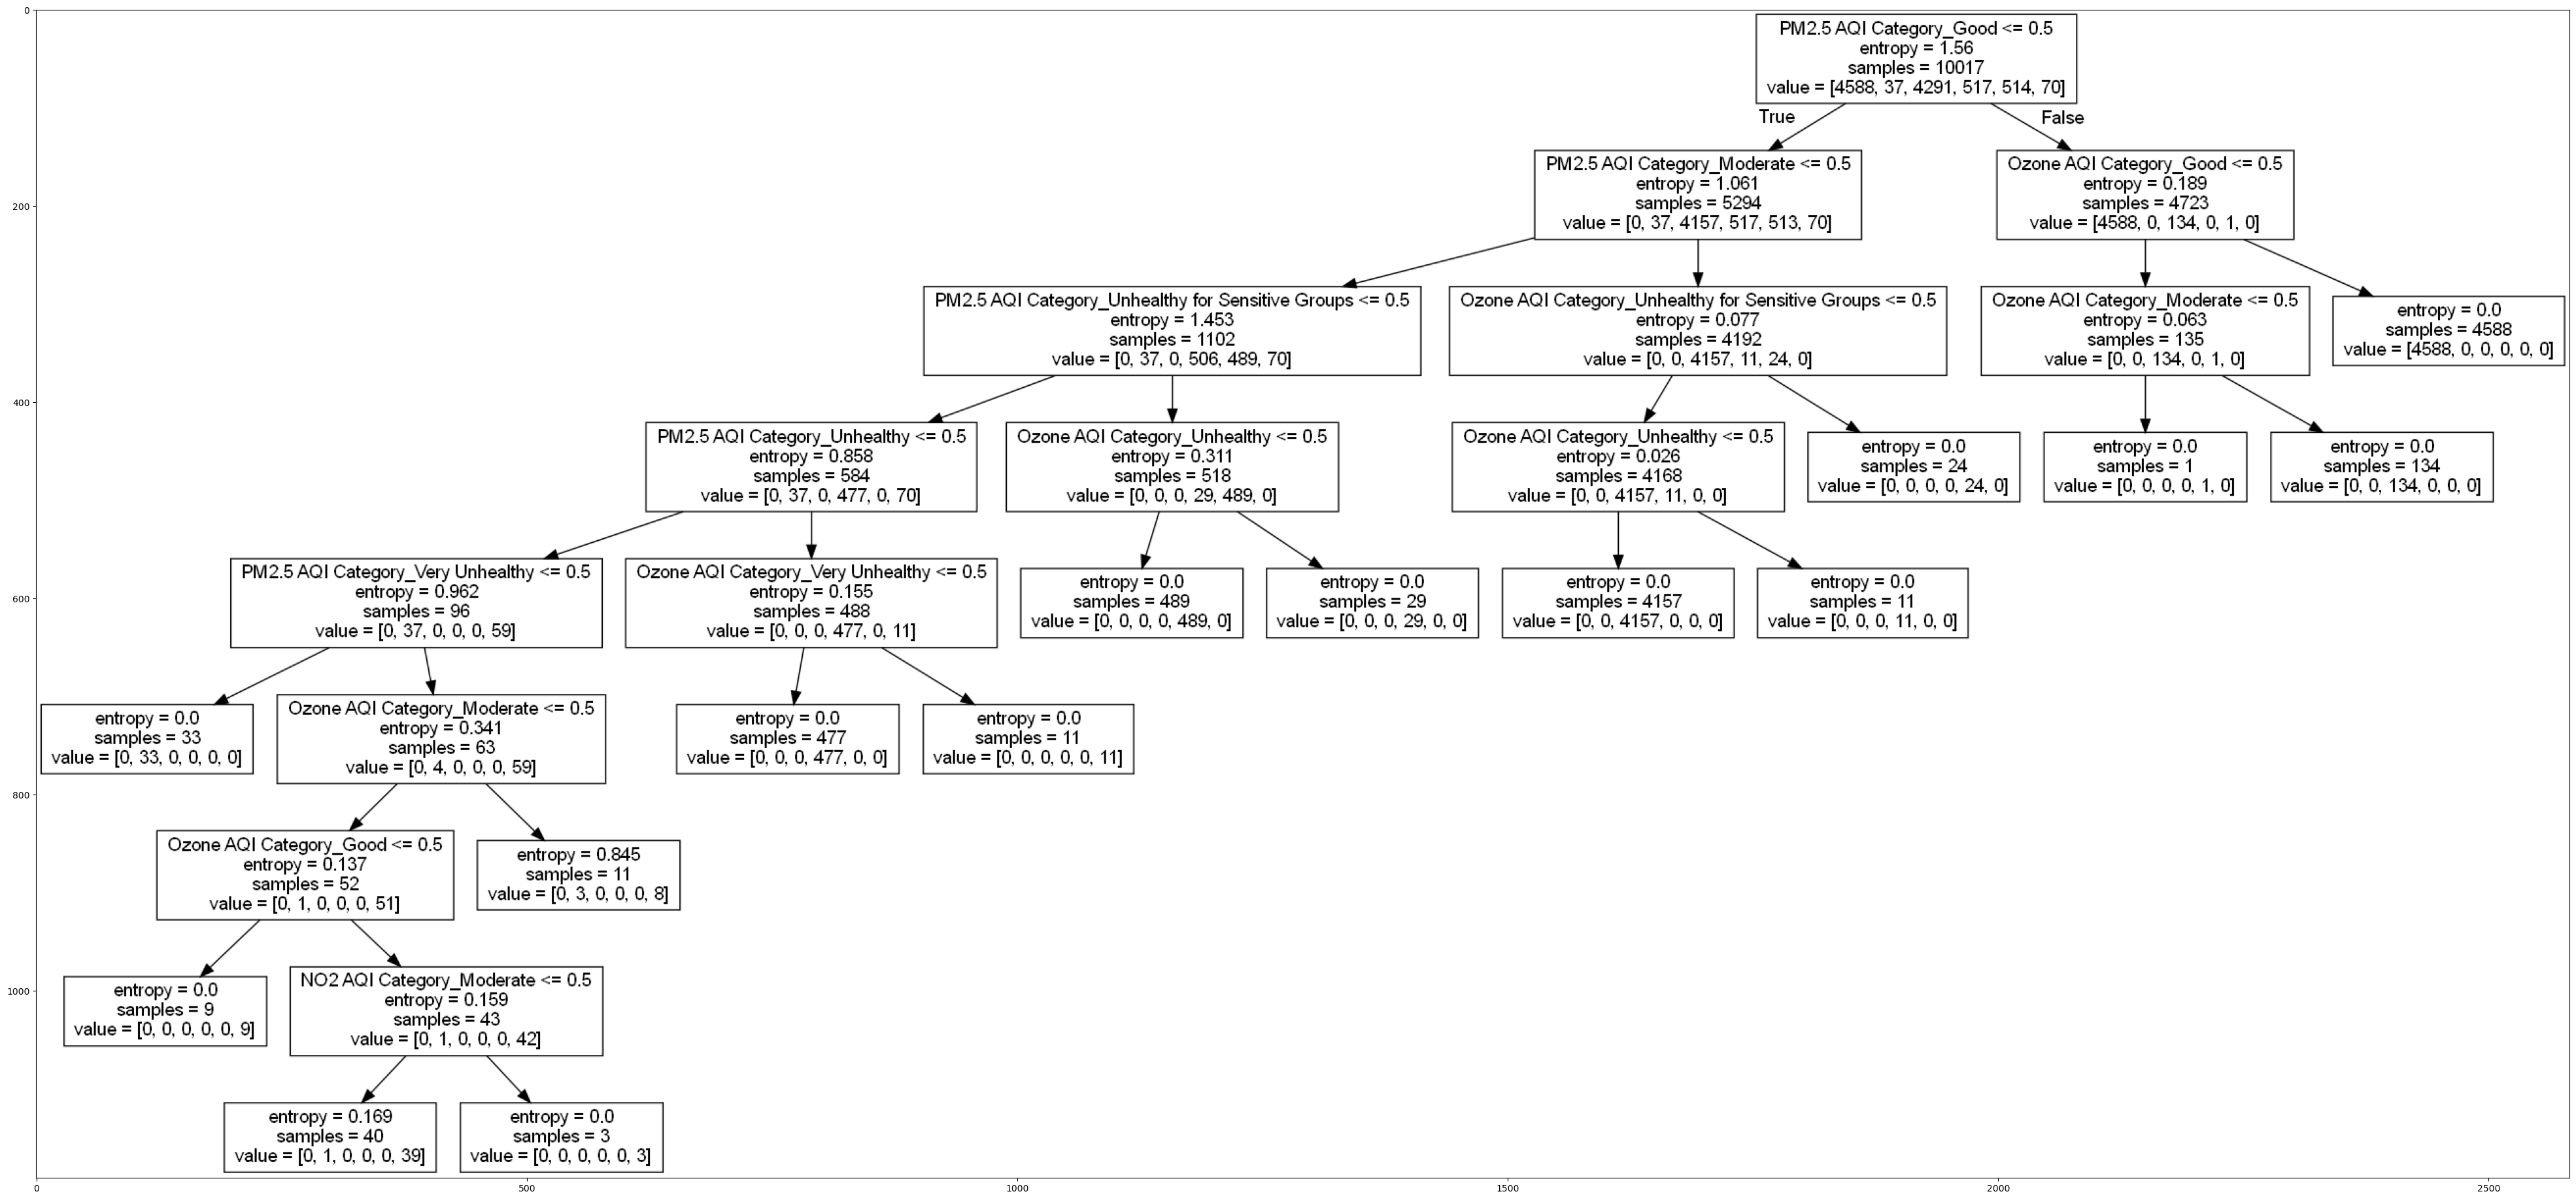

In [67]:
#AQI_1 = AQI_Numeric.iloc[:, 1:]
#AQI_1.drop(["lng", "lat"], axis = 1, inplace=True)
#print(AQI_1)
from sklearn.tree import export_graphviz
#import python-graphviz
import graphviz
export_graphviz(AQI_C, 'tree1.dot', feature_names = AQI_n.columns)
! dot -Tpng tree1.dot -o tree.png

#!pip install opencv-python

import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (50, 50))
plt.imshow(img)

In [69]:
train_accur = AQI_C.score(x_trainc,y_trainc)
print("Accuracy of the model on train data = ",train_accur)
# Getting the accuracy on test data
val_accur = AQI_C.score(x_valc,y_valc)
print("Accuracy of the model on validation data = ",val_accur)
from sklearn.metrics import classification_report
# Generating the report and printing the same
print(classification_report(y_valc,val_predc))


output_c = pd.DataFrame({"Actual" : y_valc, "Predicted" : val_predc})
print(output_c)

Accuracy of the model on train data =  0.9996006788459618
Accuracy of the model on validation data =  0.9994010182689428
                                precision    recall  f1-score   support

                          Good       1.00      1.00      1.00      1546
                     Hazardous       1.00      0.86      0.92        14
                      Moderate       1.00      1.00      1.00      1413
                     Unhealthy       1.00      1.00      1.00       172
Unhealthy for Sensitive Groups       1.00      1.00      1.00       171
                Very Unhealthy       0.92      1.00      0.96        23

                      accuracy                           1.00      3339
                     macro avg       0.99      0.98      0.98      3339
                  weighted avg       1.00      1.00      1.00      3339

         Actual Predicted
8210       Good      Good
11603  Moderate  Moderate
14933      Good      Good
3924       Good      Good
4063       Good      Good


In [71]:
test_predc = AQI_C.predict(x_testc)
test_accur = AQI_C.score(x_testc,y_testc)
print("Accuracy of the model on validation data = ",test_accur)
print(classification_report(y_testc,test_predc))

Accuracy of the model on validation data =  0.998502545672357
                                precision    recall  f1-score   support

                          Good       1.00      1.00      1.00      1574
                     Hazardous       1.00      0.73      0.84        11
                      Moderate       1.00      1.00      1.00      1350
                     Unhealthy       1.00      1.00      1.00       182
Unhealthy for Sensitive Groups       0.99      1.00      0.99       184
                Very Unhealthy       0.92      0.95      0.94        38

                      accuracy                           1.00      3339
                     macro avg       0.99      0.95      0.96      3339
                  weighted avg       1.00      1.00      1.00      3339



In [75]:
y_testc = np.array(y_testc)
y_testc = y_testc.flatten()
op_testc = pd.DataFrame({"Actual" : y_testc , "Predicted" : test_predc})
op_testc

Actual  Predicted
0          Good       Good
1          Good       Good
2      Moderate   Moderate
3      Moderate   Moderate
4      Moderate   Moderate
...         ...        ...
3334       Good       Good
3335   Moderate   Moderate
3336   Moderate   Moderate
3337  Unhealthy  Unhealthy
3338   Moderate   Moderate

[3339 rows x 2 columns]